# COP508 Machine Learning CW


<b>Name -> Neville Mathew</b>
<br>
<b>Student No. -> F120315</b>

## Table of Contents
1. [Data Ingestion](#data-ingestion)
    1. [Importing the Libraries](#import_libraries)
    2. [Importing the Dataset](#importing_dataset)
    3. [Splitting Dataset into Train & Test set](#dataset_split)
    4. [Visualising Five Images from the Dataset](#visualize_images)

2. [Data Preprocessing](#data_preprocessing)
    1. [Grayscale Conversion](#grayscale)
    2. [Normalization](#normalization)
    3. [Gaussian Blur](#blur)
    4. [Image Rotation](#rotate)
    5. [One-Hot Encoding](#encoding)

3. [Model Learning](#model_learning)
    1. [Convolutional Neural Network (CNN) Models](#cnn_models)
        1. [Base CNN Model](#base_cnn_model)
            1. [Base CNN Model -> Shuffle, 25 Epochs, Kernel Size, Grayscale & Gaussian Blur](#base_cnn_model_changes)
        2. [ResNet50 CNN Model](#resnet50_cnn_model)
        3. [Best CNN Model](#best_cnn_model)


4. [Model Evaluation](#model_evaluation)
    1. [Visualization of Base CNN Model](#visualization_base_cnn_model)
    3. [Visualization of ResNet50 CNN Model](#visualization_resnet50_cnn_model)
    4. [Visualization of Best CNN Model](#visualization_best_cnn_model)

5. [Model Prediction](#model_prediction)
    1. [Prediction of Best CNN Model](#prediction_best_cnn_model)
    
    


## <a name="data-ingestion">Data Ingestion</a>


### <a name="import_libraries">Importing the Libraries</a>


In [1]:
import os
import numpy as np
import pickle
import requests
import matplotlib.pyplot as plt
import cv2
import wget
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from sklearn.metrics import accuracy_score
from matplotlib import image
from scipy import ndimage
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from keras.utils import np_utils
from tensorflow.keras import optimizers
from keras.models import Sequential


2022-01-13 12:29:29.872508: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


### <a name="importing_dataset">Importing the Dataset</a>


In [2]:
path_to_check = os.path.join('', 'image_recognition_dataset.pth')
data_path = path_to_check


def load_dataset():
    if not os.path.exists(path_to_check):
        url = 'https://www.dropbox.com/s/j05hyf667ikzu4s/image_recognition_dataset.pth?dl=1'
        filename = wget.download(url)
        data_path = os.path.join('', filename)
    else:
        print("Data found on local {:s}".format(path_to_check))
        data_path = path_to_check

    data = pickle.load(open(data_path, 'rb'))
    train_imgs, train_labels, test_imgs, test_labels = data.values()
    return train_imgs, train_labels, test_imgs, test_labels


### <a name="dataset_split">Splitting the Dataset into the Train & Test set</a>


In [3]:
train_imgs, train_labels, test_imgs, test_labels = load_dataset()


Data found on local image_recognition_dataset.pth


### <a name="display_dataset">Displaying Dataset Information</a>


In [4]:
dataset_classes = len(np.unique(train_labels))
print("Total number of classes in dataset -> {:d}".format(dataset_classes))
print("Shape of image training set -> ", train_imgs.shape)
print("Number of training images in dataset -> ", train_imgs.shape[0])
print("Number of testing images in dataset -> ", test_imgs.shape[0])


Total number of classes in dataset -> 8
Shape of image training set ->  (40000, 32, 32, 3)
Number of training images in dataset ->  40000
Number of testing images in dataset ->  8000


### <a name="visualize_images">Visualising Five Images from the Dataset</a>


/home/lunet/conm/.conda/envs/cop508/lib/python3.9/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


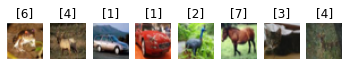

In [5]:
def plot_trained_images() -> None:
    for i in range(8):
        plt.subplot(1, 8, i+1)
        imgData = np.array(train_imgs[i])
        plt.title(train_labels[i])
        plt.imshow(imgData)
        plt.axis('off')


plot_trained_images()


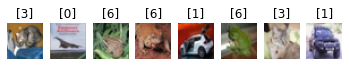

In [6]:
def plot_test_images() -> None:
    for i in range(8):
        plt.subplot(1, 8, i+1)
        imgData = np.array(test_imgs[i])
        plt.title(test_labels[i])
        plt.imshow(imgData)
        plt.axis('off')


plot_test_images()


## <a name="data_preprocessing">Data Preprocessing</a>


### <a name="grayscale">Grayscale Conversion</a>


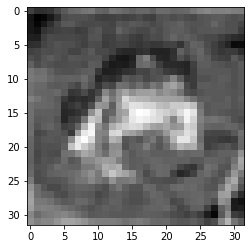

In [7]:
# Conversion of colour image to grayscale.
grayscale_train_img = [cv2.cvtColor(
    one_img, cv2.COLOR_BGR2GRAY) for one_img in train_imgs]
grayscale_test_img = [cv2.cvtColor(
    one_img, cv2.COLOR_BGR2GRAY) for one_img in test_imgs]
plt.imshow(grayscale_train_img[0], cmap='gray')


### <a name="normalization">Normalization</a>


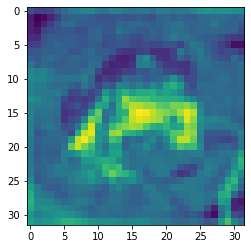

In [31]:
# Normalizing all images in the dataset in the range of 0 and 1.
normalized_train_img = [one_img/255.0 for one_img in grayscale_train_img]
normalized_test_img = [one_img/255.0 for one_img in grayscale_test_img]
plt.imshow(normalized_train_img[0])


### <a name="blur">Gaussian Blur</a>


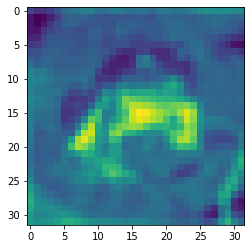

In [47]:
# Blurring images of sigma 1.
blurred_train_img = [ndimage.gaussian_filter(
    train_blur_imgs, sigma=0.5) for train_blur_imgs in normalized_train_img]
blurred_test_img = [ndimage.gaussian_filter(
    test_blur_imgs, sigma=0.5) for test_blur_imgs in normalized_test_img]
plt.imshow(blurred_train_img[0])


### <a name="rotation">Image Rotation</a>


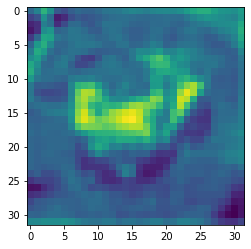

In [48]:
# Rotation of images to 180 degrees through the use of a list comprehension.
rotated_train_img = np.array([ndimage.rotate(
    train_rotate_imgs, angle=180) for train_rotate_imgs in blurred_train_img])
rotated_test_img = np.array([ndimage.rotate(
    test_rotate_imgs, angle=180) for test_rotate_imgs in blurred_test_img])
plt.imshow(rotated_train_img[0])


### <a name="encoding">One-Hot Encoding</a>


In [51]:
# Reshaping of rotated_train_img and rotated_test_img which are numpy arrays.
rotated_train_img = rotated_train_img.reshape(
    rotated_train_img.shape[0], 32, 32, 1)
rotated_test_img = rotated_test_img.reshape(
    rotated_test_img.shape[0], 32, 32, 1)

# one-hot encoding - Used to help in preprocessing categorical features of the images.
no_of_classes = 8
print("Shape of training split before one-hot encoding -> ", train_labels.shape)
Y_train = np_utils.to_categorical(train_labels, no_of_classes)
Y_test = np_utils.to_categorical(test_labels, no_of_classes)
print("Shape of training split after one-hot encoding -> ", Y_train.shape)



Shape of training split before one-hot encoding ->  (40000, 1)
Shape of training split after one-hot encoding ->  (40000, 8)


## <a name="model_learning">Model Learning</a>


### <a name="cnn_models">Convolutional Neural Network (CNN) Models</a>


#### <a name="base_cnn_model">Base CNN Model</a>


In [12]:
# Reference: https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/

# To prevent any memory build up from old models or layers.
keras.backend.clear_session()
np.random.seed(15)
tf.random.set_seed(15)


def base_cnn_model() -> Sequential:
    """
    Function which returns the base model.
    :rtype: Sequential
    """
    # Creating an early stopping function to monitor loss while keeping the best results.
    early_callback = tf.keras.callbacks.EarlyStopping(
        monitor='loss', restore_best_weights=True, patience=0)

    # Initializing Sequential model, creating linear stack of model layers.
    base_cnn_model.model1 = Sequential()

    # Adding 3 convolutional layers with max pooling and dropout functions.
    base_cnn_model.model1.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                    padding='same', input_shape=(32, 32, 3), activation='relu'))

    base_cnn_model.model1.add(Conv2D(64, kernel_size=(3, 3), strides=(
        1, 1), padding='same', activation='relu'))
    base_cnn_model.model1.add(MaxPool2D(pool_size=(2, 2)))
    base_cnn_model.model1.add(Dropout(0.25))

    base_cnn_model.model1.add(Conv2D(128, kernel_size=(3, 3), strides=(
        1, 1), padding='same', activation='relu'))
    base_cnn_model.model1.add(MaxPool2D(pool_size=(2, 2)))
    base_cnn_model.model1.add(Dropout(0.25))

    # Flattening convolutional layer output.
    base_cnn_model.model1.add(Flatten())

    # Adding 2 hidden layers.
    base_cnn_model.model1.add(Dense(500, activation='relu'))
    base_cnn_model.model1.add(Dropout(0.75))
    base_cnn_model.model1.add(Dense(250, activation='relu'))
    base_cnn_model.model1.add(Dropout(0.55))

    # Final output layer with 8 classes.
    base_cnn_model.model1.add(Dense(8, activation='softmax'))

    # Compilation of sequential model with suitable parameters.
    base_cnn_model.model1.compile(loss='categorical_crossentropy',
                metrics=['accuracy', 'AUC'], optimizer='adam')

    # Training model for 20 epochs
    base_cnn_model.base_final_model = base_cnn_model.model1.fit(rotated_train_img, Y_train, batch_size=128, epochs=20, callbacks=[
                            early_callback], validation_data=(rotated_test_img, Y_test))
    
    return base_cnn_model.model1, base_cnn_model.base_final_model

In [30]:
base_cnn_model.model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)         0

In [13]:
base_cnn_model()

2022-01-13 12:30:00.792655: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-13 12:30:00.794863: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-01-13 12:30:00.855145: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-13 12:30:00.855760: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-01-13 12:30:00.855792: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-01-13 12:30:00.857534: I tensorflow/stream_executor/platfor

Epoch 1/20


2022-01-13 12:30:02.039123: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-01-13 12:30:02.171402: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


313/313 [==============================] - 6s 13ms/step - loss: 1.9144 - accuracy: 0.2364 - auc: 0.6505 - val_loss: 1.3307 - val_accuracy: 0.5100 - val_auc: 0.8781
Epoch 2/20
313/313 [==============================] - 3s 11ms/step - loss: 1.3676 - accuracy: 0.4945 - auc: 0.8614 - val_loss: 1.0987 - val_accuracy: 0.6129 - val_auc: 0.9172
Epoch 3/20
313/313 [==============================] - 3s 11ms/step - loss: 1.1669 - accuracy: 0.5754 - auc: 0.9009 - val_loss: 0.9517 - val_accuracy: 0.6571 - val_auc: 0.9348
Epoch 4/20
313/313 [==============================] - 4s 12ms/step - loss: 1.0746 - accuracy: 0.6139 - auc: 0.9166 - val_loss: 0.8975 - val_accuracy: 0.6876 - val_auc: 0.9437
Epoch 5/20
313/313 [==============================] - 4s 12ms/step - loss: 1.0106 - accuracy: 0.6403 - auc: 0.9266 - val_loss: 0.8584 - val_accuracy: 0.6970 - val_auc: 0.9482
Epoch 6/20
313/313 [==============================] - 3s 11ms/step - loss: 0.9356 - accuracy: 0.6700 - auc: 0.9370 - val_loss: 0.8199 - 

(<tensorflow.python.keras.engine.sequential.Sequential at 0x7f4a6a89f520>,
 <tensorflow.python.keras.callbacks.History at 0x7f4a6a598430>)

##### <a name="base_cnn_model_changes">Base CNN Model -> Shuffle, 25 Epochs, Kernel Size, Grayscale & Gaussian Blur</a> 

In [78]:
# To prevent any memory build up from old models or layers.
keras.backend.clear_session()
np.random.seed(15)
tf.random.set_seed(15)


def base_cnn_model_changes() -> Sequential:
    """
    Function which returns the base model.
    :rtype: Sequential
    """
    # Creating an early stopping function to monitor loss while keeping the best results.
    early_callback = tf.keras.callbacks.EarlyStopping(
        monitor='loss', restore_best_weights=True, patience=0)

    # Initializing Sequential model, creating linear stack of model layers.
    base_cnn_model_changes.changes_model = Sequential()

    # Adding 3 convolutional layers with max pooling and dropout functions.
    base_cnn_model_changes.changes_model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1),
                    padding='same', input_shape=(32, 32, 1), activation='relu'))

    base_cnn_model_changes.changes_model.add(Conv2D(128, kernel_size=(3, 3), strides=(
        1, 1), padding='same', activation='relu'))
    base_cnn_model_changes.changes_model.add(MaxPool2D(pool_size=(2, 2)))
    base_cnn_model_changes.changes_model.add(Dropout(0.25))

    base_cnn_model_changes.changes_model.add(Conv2D(256, kernel_size=(3, 3), strides=(
        1, 1), padding='same', activation='relu'))
    base_cnn_model_changes.changes_model.add(MaxPool2D(pool_size=(2, 2)))
    base_cnn_model_changes.changes_model.add(Dropout(0.25))

    # Flattening convolutional layer output.
    base_cnn_model_changes.changes_model.add(Flatten())

    # Adding 2 hidden layers.
    base_cnn_model_changes.changes_model.add(Dense(500, activation='relu'))
    base_cnn_model_changes.changes_model.add(Dropout(0.75))
    base_cnn_model_changes.changes_model.add(Dense(250, activation='relu'))
    base_cnn_model_changes.changes_model.add(Dropout(0.55))

    # Final output layer with 8 classes.
    base_cnn_model_changes.changes_model.add(Dense(8, activation='softmax'))

    # Compilation of sequential model with suitable parameters.
    base_cnn_model_changes.changes_model.compile(loss='categorical_crossentropy',
                metrics=['accuracy', 'AUC'], optimizer='adam')

    # Training model for 25 epochs with shuffling of data.
    base_cnn_model_changes.base_final_model_changes = base_cnn_model_changes.changes_model.fit(rotated_train_img, Y_train, batch_size=128, epochs=25, callbacks=[
                            early_callback], validation_data=(rotated_test_img, Y_test), shuffle=True)
    
    return base_cnn_model_changes.changes_model, base_cnn_model_changes.base_final_model_changes

In [80]:
# Model summary
base_cnn_model_changes.changes_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 256)         0

In [79]:
base_cnn_model_changes()

Epoch 1/25
313/313 [==============================] - 6s 19ms/step - loss: 1.9875 - accuracy: 0.2045 - auc: 0.6060 - val_loss: 1.4666 - val_accuracy: 0.4816 - val_auc: 0.8462
Epoch 2/25
313/313 [==============================] - 6s 19ms/step - loss: 1.4737 - accuracy: 0.4592 - auc: 0.8354 - val_loss: 1.1934 - val_accuracy: 0.5820 - val_auc: 0.9038
Epoch 3/25
313/313 [==============================] - 6s 19ms/step - loss: 1.2495 - accuracy: 0.5486 - auc: 0.8856 - val_loss: 1.0687 - val_accuracy: 0.6158 - val_auc: 0.9174
Epoch 4/25
313/313 [==============================] - 6s 19ms/step - loss: 1.1524 - accuracy: 0.5866 - auc: 0.9031 - val_loss: 0.9877 - val_accuracy: 0.6489 - val_auc: 0.9299
Epoch 5/25
313/313 [==============================] - 6s 19ms/step - loss: 1.0762 - accuracy: 0.6164 - auc: 0.9161 - val_loss: 0.9317 - val_accuracy: 0.6702 - val_auc: 0.9386
Epoch 6/25
313/313 [==============================] - 6s 19ms/step - loss: 1.0097 - accuracy: 0.6433 - auc: 0.9261 - val_loss

(<tensorflow.python.keras.engine.sequential.Sequential at 0x7f4a6aa36070>,
 <tensorflow.python.keras.callbacks.History at 0x7f4a6a35d730>)

#### <a name="resnet50_cnn_model">ResNet-50 CNN Model</a>


In [14]:
def preprocess_image_resnet50(data_images: None) -> None:
  """
  Function to preprocess the images for ResNet50 model.
  :param data_images: Images to be preprocessed.
  :return: Preprocessed images.
  :rtype: None
  """
  data_images = data_images.astype('float32')
  output_images = tf.keras.applications.resnet50.preprocess_input(data_images)
  return output_images

# Using function to preprocess the images.
train_X = preprocess_image_resnet50(train_imgs)
valid_X = preprocess_image_resnet50(test_imgs)

In [15]:
# Reference: https://github.com/y33-j3T/Coursera-Deep-Learning/blob/master/Advanced%20Computer%20Vision%20with%20TensorFlow/Week%201%20-%20Introduction%20to%20Computer%20Vision/Copy%20of%20C3_W1_Lab_2_Transfer_Learning_CIFAR_10.ipynb

keras.backend.clear_session()
np.random.seed(15)
tf.random.set_seed(15)


def resnet50_model(image_inputs: None) -> None:
    """
    Pretrained model on imagenet weights with respective input shape.
    :param inputs: Inputs to the model.
    :return: Outputs of the model.
    :rtype: None
    """
    resnet50_model_features = tf.keras.applications.ResNet50(input_shape=(224, 224, 3),
                                                             include_top=False,
                                                             weights='imagenet')(image_inputs)

    return resnet50_model_features


def resnet50_classifier(image_inputs: None) -> None:
    """
    Initialize hidden layer and output layer with softmax activation function.
    :param image_inputs: Image inputs to the model.
    :return: Outputs of the model.
    :rtype: None
    """
    classify = tf.keras.layers.GlobalAveragePooling2D()(image_inputs)
    classify = tf.keras.layers.Flatten()(classify)
    classify = tf.keras.layers.Dense(1024, activation="relu")(classify)
    classify = tf.keras.layers.Dense(512, activation="relu")(classify)
    classify = tf.keras.layers.Dense(8, activation="softmax",
                                     name="classification")(classify)

    return classify


def complete_resnet50_model(image_inputs: None) -> None:
    """
    Upsampling in order to transform the images with the input size as (224, 224).
    :param image_inputs: Image inputs to the model.
    :return: Classification layer of the model.
    :rtype: None
    """

    upsample = tf.keras.layers.UpSampling2D(size=(7, 7))(image_inputs)

    resnet_extractor = resnet50_model(upsample)
    final_classification = resnet50_classifier(resnet_extractor)

    return final_classification


def compile_resnet50_model() -> None:
    """
    Compile the model with the optimizer, loss function and metrics.
    :param model: Model to be compiled.
    :return: Compiled model.
    :rtype: None
    """
    image_inputs = tf.keras.layers.Input(shape=(32, 32, 3))

    final_classification = complete_resnet50_model(image_inputs)
    model = tf.keras.Model(inputs=image_inputs, outputs=final_classification)

    model.compile(optimizer='SGD',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


model = compile_resnet50_model()


In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800

In [17]:
# Training ResNet50 model for 4 epochs.
resnet_model = model.fit(train_X, train_labels, epochs=4,
                         validation_data=(valid_X, test_labels), batch_size=64)


Epoch 1/4
625/625 [==============================] - 161s 254ms/step - loss: 0.7654 - accuracy: 0.7421 - val_loss: 0.2166 - val_accuracy: 0.9261
Epoch 2/4
625/625 [==============================] - 159s 255ms/step - loss: 0.1136 - accuracy: 0.9636 - val_loss: 0.1708 - val_accuracy: 0.9442
Epoch 3/4
625/625 [==============================] - 159s 255ms/step - loss: 0.0372 - accuracy: 0.9897 - val_loss: 0.1670 - val_accuracy: 0.9474
Epoch 4/4
625/625 [==============================] - 159s 255ms/step - loss: 0.0133 - accuracy: 0.9977 - val_loss: 0.1732 - val_accuracy: 0.9513


#### <a name="best_cnn_model">Best CNN Model</a>


In [18]:
# To prevent any memory build up from old models or layers.
keras.backend.clear_session()
np.random.seed(15)
tf.random.set_seed(15)

def best_cnn_model() -> Sequential:
    """
    Function which returns the best model.
    :rtype: Sequential
    """
    # Creating an early stopping function to monitor loss while keeping the best results.
    early_callback = tf.keras.callbacks.EarlyStopping(
        monitor='loss', restore_best_weights=True, patience=10)

    # Initializing Sequential model, creating linear stack of model layers.
    best_cnn_model.model2 = Sequential()

    # Adding 6 convolutional layers with max pooling and dropout functions.
    best_cnn_model.model2.add(Conv2D(32, input_shape=(32, 32, 3), kernel_size=(
        3, 3), strides=(1, 1), padding="same", activation="relu"))

    best_cnn_model.model2.add(Conv2D(64, kernel_size=(3, 3), strides=(
        1, 1), padding="same", activation="relu"))
    best_cnn_model.model2.add(MaxPool2D(pool_size=(2, 2)))
    best_cnn_model.model2.add(Dropout(0.25))

    best_cnn_model.model2.add(Conv2D(128, kernel_size=(3, 3), strides=(
        1, 1), padding="same", activation="relu"))
    best_cnn_model.model2.add(MaxPool2D(pool_size=(2, 2)))
    best_cnn_model.model2.add(Dropout(0.25))

    best_cnn_model.model2.add(Conv2D(256, kernel_size=(3, 3), strides=(
        1, 1), padding="same", activation="relu"))
    best_cnn_model.model2.add(MaxPool2D(pool_size=(2, 2)))
    best_cnn_model.model2.add(Dropout(0.25))

    best_cnn_model.model2.add(Conv2D(512, kernel_size=(3, 3), strides=(
        1, 1), padding="same", activation="relu"))
    best_cnn_model.model2.add(MaxPool2D(pool_size=(2, 2)))
    best_cnn_model.model2.add(Dropout(0.25))

    best_cnn_model.model2.add(Conv2D(512, kernel_size=(3, 3), strides=(
        1, 1), padding="same", activation="relu"))
    best_cnn_model.model2.add(MaxPool2D(pool_size=(2, 2)))
    best_cnn_model.model2.add(Dropout(0.25))

    # Flattening convolutional layer output.
    best_cnn_model.model2.add(Flatten())

    # Adding 2 hidden layers.
    best_cnn_model.model2.add(Dense(500, activation="relu"))
    best_cnn_model.model2.add(Dropout(0.75))
    best_cnn_model.model2.add(Dense(200, activation="relu"))
    best_cnn_model.model2.add(Dropout(0.3))

    # Final output layer with 8 classes.
    best_cnn_model.model2.add(Dense(8, activation="softmax"))

    # Compilation of sequential model with suitable parameters.
    best_cnn_model.model2.compile(optimizer='adam', loss='categorical_crossentropy',
                metrics=['accuracy'])

    # Training model for 25 epochs
    best_cnn_model.best_model = best_cnn_model.model2.fit(rotated_train_img, Y_train, batch_size=128, callbacks=[
                    early_callback], epochs=25, validation_data=(rotated_test_img, Y_test))
    
    return best_cnn_model.model2, best_cnn_model.best_model


In [29]:
best_cnn_model.model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)         0

In [19]:
best_cnn_model()

Epoch 1/25
313/313 [==============================] - 5s 14ms/step - loss: 1.9986 - accuracy: 0.1792 - val_loss: 1.5832 - val_accuracy: 0.4174
Epoch 2/25
313/313 [==============================] - 5s 15ms/step - loss: 1.4886 - accuracy: 0.4418 - val_loss: 1.1612 - val_accuracy: 0.5748
Epoch 3/25
313/313 [==============================] - 5s 15ms/step - loss: 1.2153 - accuracy: 0.5490 - val_loss: 1.1148 - val_accuracy: 0.5947
Epoch 4/25
313/313 [==============================] - 5s 15ms/step - loss: 1.0839 - accuracy: 0.6051 - val_loss: 0.9494 - val_accuracy: 0.6586
Epoch 5/25
313/313 [==============================] - 5s 15ms/step - loss: 0.9925 - accuracy: 0.6462 - val_loss: 0.8811 - val_accuracy: 0.6762
Epoch 6/25
313/313 [==============================] - 5s 15ms/step - loss: 0.8955 - accuracy: 0.6825 - val_loss: 0.8992 - val_accuracy: 0.6840
Epoch 7/25
313/313 [==============================] - 5s 15ms/step - loss: 0.8774 - accuracy: 0.6931 - val_loss: 0.7994 - val_accuracy: 0.7221

(<tensorflow.python.keras.engine.sequential.Sequential at 0x7f4a6bd1d4f0>,
 <tensorflow.python.keras.callbacks.History at 0x7f499013b550>)

## <a name="model_evaluation">Model Evaluation</a>


### <a name="visualization_base_cnn_model">Visualization of Base CNN Model</a>


250/250 - 1s - loss: 0.6641 - accuracy: 0.7680 - auc: 0.9671
Test accuracy on test data split ->  0.6641378998756409


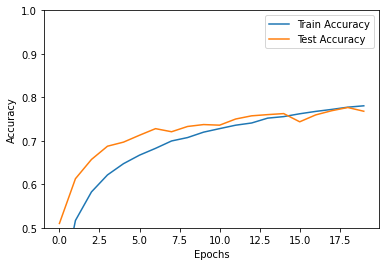

In [20]:
# Create line graph for displaying test and train accuracy.
plt.plot(base_cnn_model.base_final_model.history['accuracy'], label='Train Accuracy')
plt.plot(base_cnn_model.base_final_model.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='best')

# Calculate the test accuracy.
test_acc, test_loss, *_= base_cnn_model.model1.evaluate(rotated_test_img, Y_test, verbose=2)
print('Test accuracy on test data split -> ', test_acc)


### <a name="visualization_base_cnn_model_changes">Base CNN Model -> Shuffle, 25 Epochs, Kernel Size, Grayscale & Gaussian Blur</a>

250/250 - 1s - loss: 0.7301 - accuracy: 0.7470 - auc: 0.9608
Test accuracy on test data split ->  0.7300958037376404


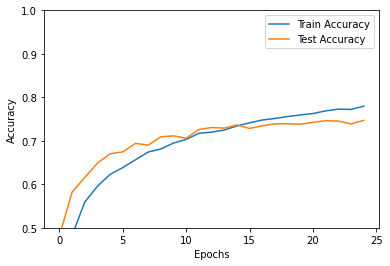

In [81]:
# Plot line graph for displaying test and train accuracy.
plt.plot(base_cnn_model_changes.base_final_model_changes.history['accuracy'], label='Train Accuracy')
plt.plot(base_cnn_model_changes.base_final_model_changes.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='best')

# Calculate the test accuracy.
test_acc, test_loss, *_= base_cnn_model_changes.changes_model.evaluate(rotated_test_img, Y_test, verbose=2)
print('Test accuracy on test data split -> ', test_acc)

###  <a name="visualization_resnet50_cnn_model">Visualization of ResNet50 CNN Model</a>

250/250 [==============================] - 9s 34ms/step - loss: 0.7570 - accuracy: 0.7980
Test accuracy on test data split ->  0.7569841742515564


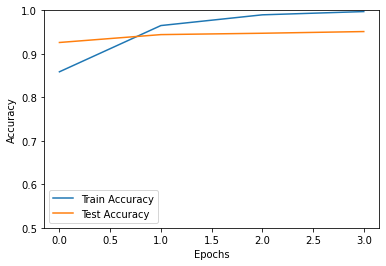

In [25]:
# Create line graph for displaying test and train accuracy.
plt.plot(resnet_model.history['accuracy'], label='Train Accuracy')
plt.plot(resnet_model.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='best')

test_acc, test_loss, *_ = model.evaluate(test_imgs, test_labels)
print('Test accuracy on test data split -> ', test_acc)

### <a name="visualization_best_cnn_model">Visualization of Best Model</a>


250/250 [==============================] - 1s 4ms/step - loss: 0.5548 - accuracy: 0.8123
Test accuracy on test data split ->  0.5548332929611206


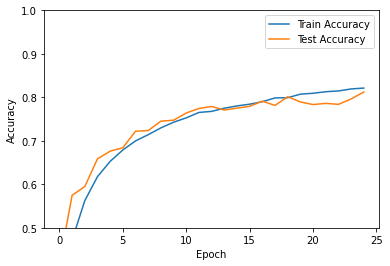

In [23]:
# Create line graph for displaying test and train accuracy.
plt.plot(best_cnn_model.best_model.history['accuracy'], label='Train Accuracy')
plt.plot(best_cnn_model.best_model.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='best')

# Calculate the test accuracy.
test_acc, test_loss, *_ = best_cnn_model.model2.evaluate(rotated_test_img, Y_test)
print('Test accuracy on test data split -> ', test_acc)


###

## <a name="model_prediction">Model Prediction</a>


### <a name="prediction_best_cnn_model">Prediction of Best CNN Model</a>


In [26]:
# Refernce: https://github.com/y33-j3T/Coursera-Deep-Learning/blob/master/Advanced%20Computer%20Vision%20with%20TensorFlow/Week%201%20-%20Introduction%20to%20Computer%20Vision/Copy%20of%20C3_W1_Lab_2_Transfer_Learning_CIFAR_10.ipynb

# Define classes/objects.
classes = ['airplane', 'automobile', 'bird',
           'cat', 'deer', 'dog', 'frog', 'horse']


def display_predictions(predict_test_imgs: None, preds: str, labels: str, title: str) -> str:
    """
    Define function to plot images.
    Displays images with actual and predicted labels.
    :param None predict_test_imgs: Image to be displayed.
    :param str preds: Predicted labels.
    :param str labels: Actual labels.
    :param str title: Title of figure.
    :rtype: str
    """

    n_of_classes = 8

    indexes = np.random.choice(len(preds), size=n_of_classes)
    n_predict_test_imgs = predict_test_imgs[indexes]
    n_preds = preds[indexes]
    n_preds = n_preds.reshape((n_of_classes))
    n_labels = labels[indexes]

    fig = plt.figure(figsize=(20, 3))
    plt.title(title)
    plt.yticks([])
    plt.xticks([])

# Display 8 random test images along with their actual and predicted labels.
    for z in range(8):
        ax = fig.add_subplot(1, 8, z+1)
        class_index = n_preds[z]
        actual_pred_labels = 'Predicted -> ' + classes[class_index]
        plt.xlabel(actual_pred_labels)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(n_predict_test_imgs[z])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


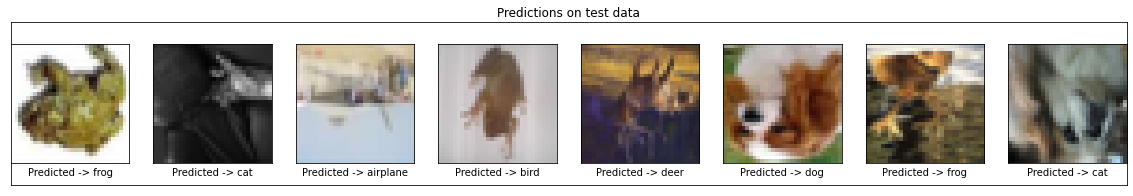

In [28]:
# Using the trained model to predict the test images.
pred_chance = best_cnn_model.model2.predict(rotated_test_img, batch_size=128)
pred_chance = np.argmax(pred_chance, axis=1)

# Utilizing display_predictions function to display images.
display_predictions(
    rotated_test_img, pred_chance, Y_test, 'Predictions on test data')